In [30]:
!gdown https://drive.google.com/uc?id=1LBMr_jSJl8wbTQb5-JaxE0HO77BSkhLC -O /tmp/horse-or-human.zip
!gdown https://drive.google.com/uc?id=1um0XZ76xnosqwdNTBUsxaWxwYcabjbez -O /tmp/validation-horse-or-human.zip

Downloading...
From: https://drive.google.com/uc?id=1LBMr_jSJl8wbTQb5-JaxE0HO77BSkhLC
To: /tmp/horse-or-human.zip
150MB [00:03, 47.2MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1um0XZ76xnosqwdNTBUsxaWxwYcabjbez
To: /tmp/validation-horse-or-human.zip
11.5MB [00:00, 36.7MB/s]


In [31]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

```
/tmp/horse-or-human
├── horses
└── humans

/tmp/validation-horse-or-human
├── horses
└── humans
```

In [32]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [33]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse34-5.png', 'horse40-3.png', 'horse07-2.png', 'horse35-1.png', 'horse09-8.png', 'horse13-7.png', 'horse20-1.png', 'horse31-7.png', 'horse26-3.png', 'horse03-9.png']
['human10-17.png', 'human10-14.png', 'human08-12.png', 'human16-28.png', 'human05-19.png', 'human17-30.png', 'human06-04.png', 'human07-15.png', 'human02-00.png', 'human15-28.png']
['horse5-360.png', 'horse6-275.png', 'horse1-127.png', 'horse3-521.png', 'horse5-065.png', 'horse5-018.png', 'horse6-345.png', 'horse4-503.png', 'horse4-403.png', 'horse6-161.png']
['valhuman01-06.png', 'valhuman02-11.png', 'valhuman02-03.png', 'valhuman05-15.png', 'valhuman01-00.png', 'valhuman04-08.png', 'valhuman03-07.png', 'valhuman05-07.png', 'valhuman04-05.png', 'valhuman04-23.png']


In [34]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


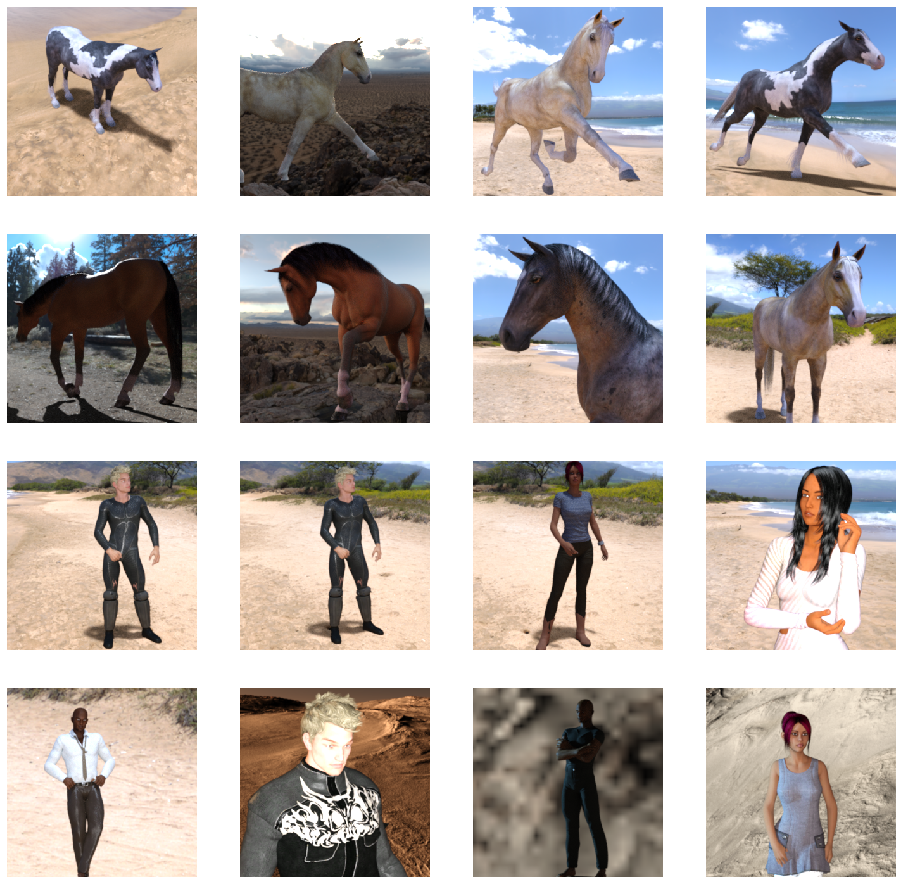

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

## Building a Small Model from Scratch

In [36]:
import tensorflow as tf

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [39]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Data Preprocessing

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/', 
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/', 
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training

In [42]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 2,
    validation_data = validation_generator,
    validation_steps = 8)

Epoch 1/15
8/8 - 7s - loss: 1.1729 - acc: 0.5050 - val_loss: 0.6863 - val_acc: 0.5078
Epoch 2/15
8/8 - 7s - loss: 0.6807 - acc: 0.5695 - val_loss: 0.5579 - val_acc: 0.8750
Epoch 3/15
8/8 - 6s - loss: 0.6903 - acc: 0.6730 - val_loss: 0.5282 - val_acc: 0.8672
Epoch 4/15
8/8 - 7s - loss: 0.4972 - acc: 0.7910 - val_loss: 1.0353 - val_acc: 0.7695
Epoch 5/15
8/8 - 7s - loss: 0.3255 - acc: 0.8865 - val_loss: 0.6486 - val_acc: 0.8711
Epoch 6/15
8/8 - 6s - loss: 0.1855 - acc: 0.9310 - val_loss: 0.9720 - val_acc: 0.8867
Epoch 7/15
8/8 - 6s - loss: 0.3303 - acc: 0.8765 - val_loss: 0.7732 - val_acc: 0.8555
Epoch 8/15
8/8 - 6s - loss: 0.1305 - acc: 0.9455 - val_loss: 1.3154 - val_acc: 0.8359
Epoch 9/15
8/8 - 6s - loss: 0.3982 - acc: 0.8921 - val_loss: 5.4381 - val_acc: 0.5859
Epoch 10/15
8/8 - 6s - loss: 0.3371 - acc: 0.9244 - val_loss: 1.1857 - val_acc: 0.8516
Epoch 11/15
8/8 - 7s - loss: 0.0488 - acc: 0.9800 - val_loss: 1.0504 - val_acc: 0.8750
Epoch 12/15
8/8 - 8s - loss: 0.0665 - acc: 0.9814 - 

### Running the Model

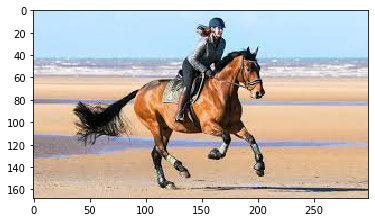

predicted as human with certainty of  1.0


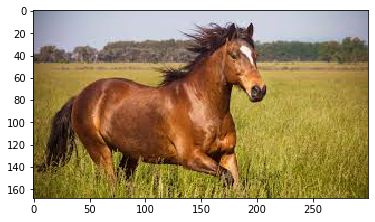

predicted as horse with certainty of  1.0


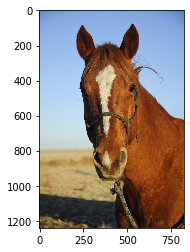

predicted as horse with certainty of  1.0


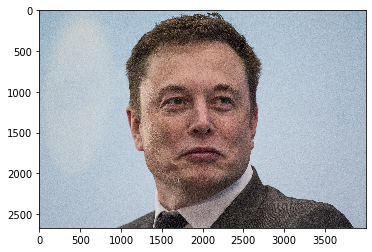

predicted as human with certainty of  1.0


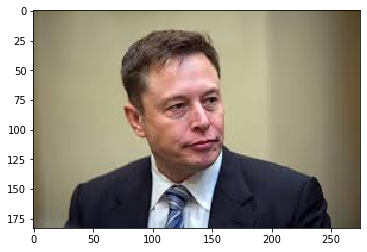

predicted as horse with certainty of  1.0


In [47]:
import numpy as np
import random
from keras.preprocessing import image

# load test images
test_images = ['test_horse.jpeg', 'test_horse_human.jpeg', 'test_horse_head.jpg', 'test_elon_musk.jpg', 'test_elon_musk1.jpeg']

for test_image in test_images:
    img = image.load_img(test_image)
    plt.imshow(img)
    plt.show()
    img = image.load_img(test_image, target_size=(300,300)) # PIL image
    x = image.img_to_array(img) # Numpy: (300, 300, 3)
    x = np.expand_dims(x, axis=0) # (1, 300, 300, 3)
    prob = np.squeeze(model.predict(x))
    if prob > 0.5:
        print("predicted as human with certainty of ", prob)
    else:
        print("predicted as horse with certainty of ", 1- prob)

## Visualizing Intermediate Representations

In [49]:
layer_outputs = [layer.output for layer in model.layers]
for layer_output in layer_outputs[:10]:
    print(layer_output.name)

conv2d_5/Identity:0
max_pooling2d_5/Identity:0
conv2d_6/Identity:0
max_pooling2d_6/Identity:0
conv2d_7/Identity:0
max_pooling2d_7/Identity:0
conv2d_8/Identity:0
max_pooling2d_8/Identity:0
conv2d_9/Identity:0
max_pooling2d_9/Identity:0


/tmp/horse-or-human/horses/horse38-9.png


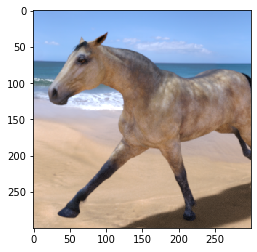

In [50]:
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[:10])
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
print(img_path)
img = image.load_img(img_path, target_size=(300,300))
plt.imshow(img)

0: (1, 298, 298, 16)
1: (1, 149, 149, 16)
2: (1, 147, 147, 32)
3: (1, 73, 73, 32)
4: (1, 71, 71, 64)
5: (1, 35, 35, 64)
6: (1, 33, 33, 64)
7: (1, 16, 16, 64)
8: (1, 14, 14, 64)
9: (1, 7, 7, 64)


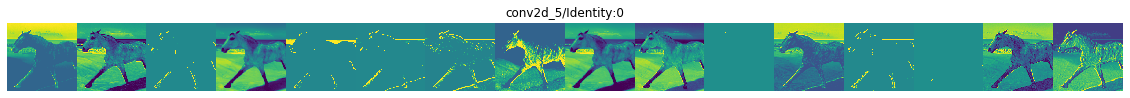

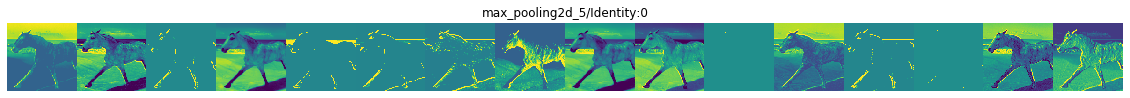

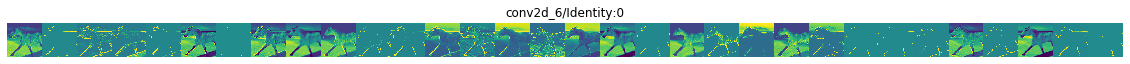

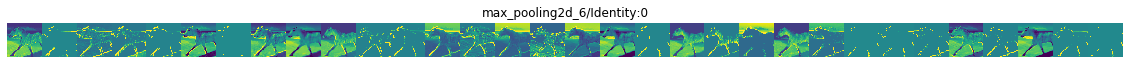

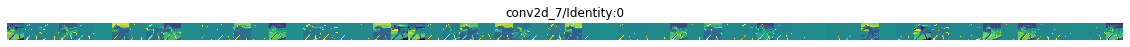

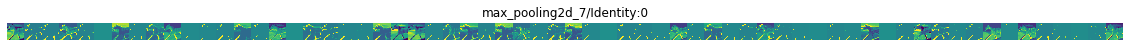

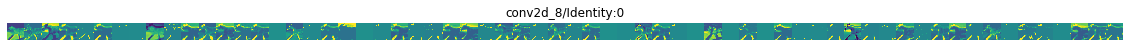

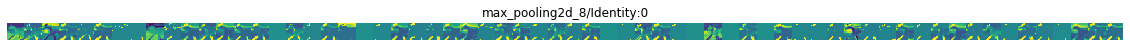

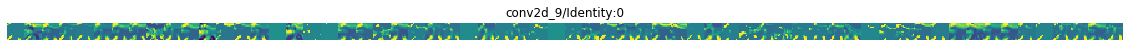

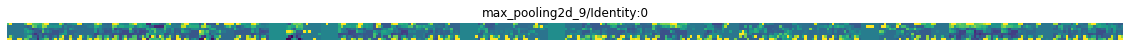

In [53]:
x = image.img_to_array(img) # (300, 300, 3)
x = x.reshape((1,) + x.shape) # (1, 300, 300, 3)
x /= 255.0

layer_output_maps = visualization_model.predict(x)
for i, layer_output_map in enumerate(layer_output_maps):
    print("{}: {}".format(i, layer_output_map.shape))
    
layer_names = [layer.name for layer in layer_outputs[:10]]
for layer_name, feature_map in zip(layer_names, layer_output_maps):
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= (x.std() + 1e-6)
        x *=64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i+1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.axis('off')
    plt.imshow(display_grid, aspect='auto', cmap='viridis')